<a href="https://colab.research.google.com/github/Sinandah/Sinandah/blob/main/Another_copy_of_c19_ana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
!pip install pandas matplotlib seaborn plotly

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# URL of the COVID-19 vaccination dataset
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(url)

# Display basic information about the dataset
print(df.info())

# Display the first few rows of the dataset
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365565 entries, 0 to 365564
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    365565 non-null  object 
 1   continent                                   348099 non-null  object 
 2   location                                    365565 non-null  object 
 3   date                                        365565 non-null  object 
 4   total_cases                                 327216 non-null  float64
 5   new_cases                                   355673 non-null  float64
 6   new_cases_smoothed                          354414 non-null  float64
 7   total_deaths                                305512 non-null  float64
 8   new_deaths                                  355720 non-null  float64
 9   new_deaths_smoothed                         354490 non-null  float64
 

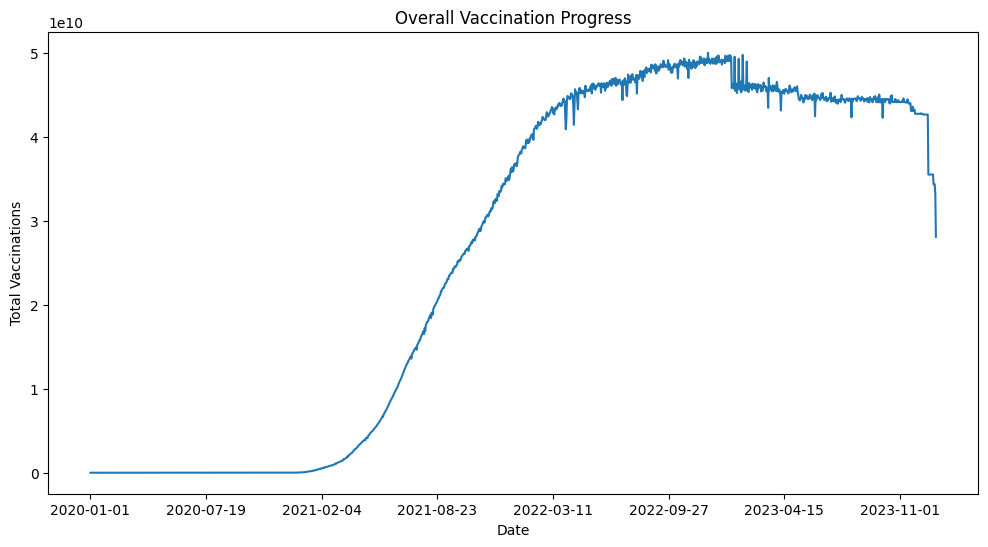

In [ ]:
# Group by date and calculate total vaccinations
total_vaccinations_by_date = df.groupby('date')['total_vaccinations'].sum()

# Plotting
plt.figure(figsize=(12, 6))
total_vaccinations_by_date.plot()
plt.title('Overall Vaccination Progress')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.show()


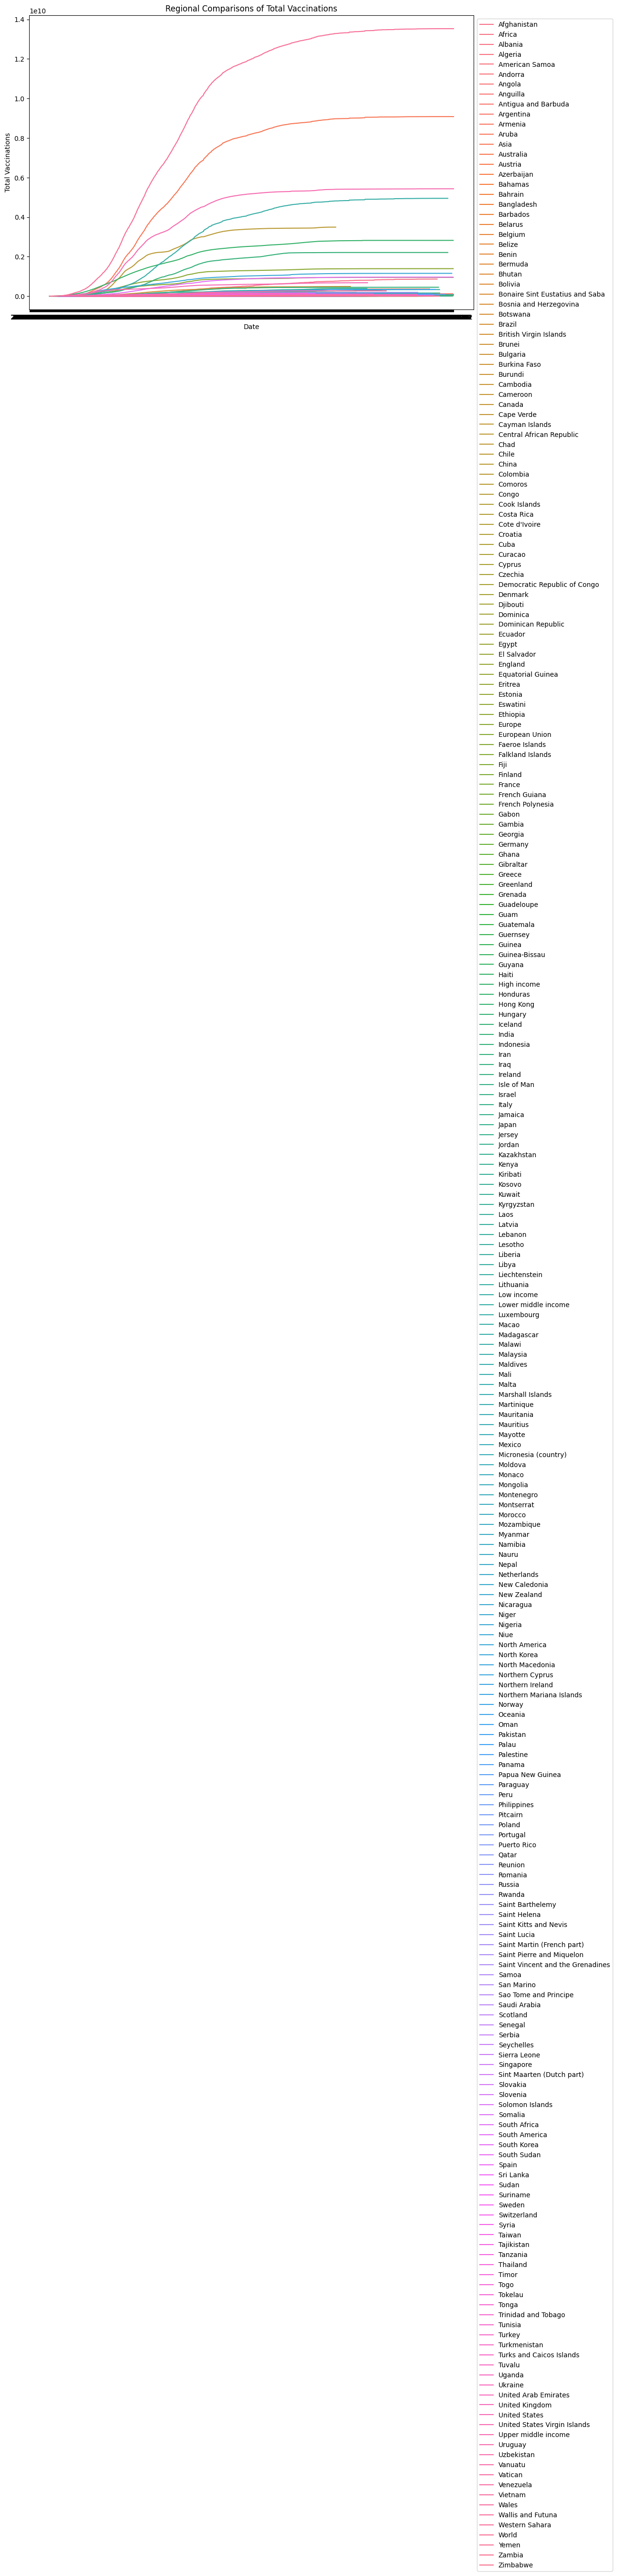

In [ ]:
# Select relevant columns for regional comparison
regional_data = df[['date', 'location', 'total_vaccinations']]

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(data=regional_data, x='date', y='total_vaccinations', hue='location')
plt.title('Regional Comparisons of Total Vaccinations')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()


In [ ]:
# Count the occurrences of each vaccine
vaccine_counts = df['vaccine'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
vaccine_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of COVID-19 Vaccines')
plt.xlabel('Vaccine')
plt.ylabel('Number of Occurrences')
plt.show()


NameError: ignored

In [ ]:
# Create a timeline of significant events
timeline_data = df[['date', 'total_vaccinations', 'vaccines', 'new_vaccinations']]

# Plotting
fig = px.timeline(timeline_data, x_start='date', x_end='new_vaccinations', y='vaccines', labels={'new_vaccinations': 'New Vaccinations'})
fig.update_layout(title='Timeline of Vaccination Campaigns')
fig.show()


In [ ]:
# Select relevant columns for demographic analysis
demographic_data = df[['date', 'location', 'total_vaccinations_per_hundred', 'age_group', 'gender']]

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=demographic_data, x='total_vaccinations_per_hundred', y='age_group', hue='gender', palette='Set2')
plt.title('Demographic Analysis of Vaccination Coverage')
plt.xlabel('Total Vaccinations per Hundred People')
plt.ylabel('Age Group')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()


In [ ]:
# Select relevant columns for impact analysis
impact_data = df[['date', 'location', 'total_vaccinations', 'total_cases', 'total_deaths']]

# Calculate vaccination coverage percentage
impact_data['vaccination_coverage'] = (impact_data['total_vaccinations'] / impact_data['total_population']) * 100

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.plot(impact_data['date'], impact_data['vaccination_coverage'], color='b', label='Vaccination Coverage (%)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Vaccination Coverage (%)', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(impact_data['date'], impact_data['total_cases'], color='r', label='Total Cases')
ax2.plot(impact_data['date'], impact_data['total_deaths'], color='g', label='Total Deaths')
ax2.set_ylabel('Total Cases and Deaths', color='black')
ax2.tick_params('y', colors='black')

fig.tight_layout()
plt.title('Impact of Vaccination on Cases and Deaths')
plt.show()


In [ ]:
# Select relevant columns for forecasting
forecast_data = df[['date', 'total_vaccinations']]

# Convert 'date' to datetime format
forecast_data['date'] = pd.to_datetime(forecast_data['date'])

# Set 'date' as the index for time-series analysis
forecast_data.set_index('date', inplace=True)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(forecast_data.index, forecast_data['total_vaccinations'], label='Total Vaccinations')
plt.title('Forecasting Future Vaccination Trends')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.show()


In [ ]:
# Create an interactive bar chart using Plotly Express
fig = px.bar(df, x='location', y='total_vaccinations', color='vaccine', title='Interactive Vaccination Dashboard',
             labels={'total_vaccinations': 'Total Vaccinations'})
fig.update_layout(barmode='stack')
fig.show()


In [ ]:
# Select relevant columns for strategy comparison
strategy_data = df[['date', 'location', 'total_vaccinations', 'daily_vaccinations_per_million', 'government_reaction_index']]

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=strategy_data, x='daily_vaccinations_per_million', y='total_vaccinations', hue='government_reaction_index', palette='viridis')
plt.title('Comparison of Vaccination Strategies')
plt.xlabel('Daily Vaccinations per Million People')
plt.ylabel('Total Vaccinations')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()


In [ ]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set 'date' as the index for time series analysis
df.set_index('date', inplace=True)

# Resample the data to monthly frequency and calculate monthly average vaccinations
monthly_avg_vaccinations = df['total_vaccinations'].resample('M').mean()

# Plotting
plt.figure(figsize=(12, 6))
monthly_avg_vaccinations.plot(marker='o')
plt.title('Monthly Average Vaccinations')
plt.xlabel('Date')
plt.ylabel('Monthly Average Vaccinations')
plt.show()


In [ ]:
# Install geopandas for geospatial analysis
!pip install geopandas

import geopandas as gpd

# Load world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge world map data with vaccination data
merged_data = world.merge(df, left_on='name', right_on='location')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='total_vaccinations', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Total Vaccinations by Country')
ax.axis('off')
plt.show()


In [ ]:
# Install TextBlob for sentiment analysis
!pip install textblob

from textblob import TextBlob

# Extract tweets related to COVID-19 vaccination using a hypothetical dataset 'tweets.csv'
# You need to have a dataset of tweets for this step

# Load the tweet dataset
tweets_df = pd.read_csv('path/to/tweets.csv')

# Perform sentiment analysis
tweets_df['sentiment'] = tweets_df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(tweets_df['sentiment'], bins=20, kde=True)
plt.title('Distribution of Sentiment in COVID-19 Vaccination Tweets')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Install scikit-learn for machine learning
!pip install scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare data for machine learning
ml_data = df[['total_vaccinations', 'people_fully_vaccinated']].dropna()
X = ml_data[['people_fully_vaccinated']]
y = ml_data['total_vaccinations']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plotting
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Machine Learning Predictions of Total Vaccinations')
plt.xlabel('People Fully Vaccinated')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.show()


In [ ]:
# Count the number of people vaccinated in each age group
age_group_distribution = df.groupby('age_group')['total_vaccinations'].sum()

# Plotting
plt.figure(figsize=(10, 6))
age_group_distribution.plot(kind='bar', color='skyblue')
plt.title('Age Group Distribution of Vaccinations')
plt.xlabel('Age Group')
plt.ylabel('Total Vaccinations')
plt.show()


In [ ]:
# Select relevant columns for vaccine effectiveness comparison
vaccine_effectiveness_data = df[['date', 'location', 'total_vaccinations', 'people_fully_vaccinated', 'total_cases', 'total_deaths']]

# Calculate vaccine effectiveness as a percentage reduction in cases and deaths
vaccine_effectiveness_data['cases_reduction'] = ((vaccine_effectiveness_data['total_cases'].shift(-14) - vaccine_effectiveness_data['total_cases']) / vaccine_effectiveness_data['total_cases']) * 100
vaccine_effectiveness_data['deaths_reduction'] = ((vaccine_effectiveness_data['total_deaths'].shift(-14) - vaccine_effectiveness_data['total_deaths']) / vaccine_effectiveness_data['total_deaths']) * 100

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.plot(vaccine_effectiveness_data['date'], vaccine_effectiveness_data['cases_reduction'], color='b', label='Cases Reduction (%)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cases Reduction (%)', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(vaccine_effectiveness_data['date'], vaccine_effectiveness_data['deaths_reduction'], color='r', label='Deaths Reduction (%)')
ax2.set_ylabel('Deaths Reduction (%)', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.title('Vaccine Effectiveness Comparison')
plt.show()


In [ ]:
# Select relevant columns for income level analysis
income_level_data = df[['date', 'location', 'total_vaccinations', 'human_development_index']]

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=income_level_data, x='human_development_index', y='total_vaccinations', hue='location', palette='viridis')
plt.title('Vaccination Rate by Human Development Index')
plt.xlabel('Human Development Index')
plt.ylabel('Total Vaccinations')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()


In [ ]:
# Prepare data for stacked area chart
vaccine_distribution_data = df[['date', 'total_vaccinations', 'people_fully_vaccinated', 'vaccine']]

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
vaccine_distribution_data.plot.area(x='date', y=['total_vaccinations', 'people_fully_vaccinated'], stacked=True, colormap='viridis', ax=ax)
plt.title('Stacked Area Chart of Vaccine Distribution')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.show()


In [ ]:
# Select relevant columns for adverse reactions analysis
adverse_reactions_data = df[['date', 'location', 'total_vaccinations', 'people_vaccinated', 'serious_adverse_events']]

# Calculate the percentage of serious adverse events per total vaccinations
adverse_reactions_data['adverse_events_percentage'] = (adverse_reactions_data['serious_adverse_events'] / adverse_reactions_data['total_vaccinations']) * 100

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=adverse_reactions_data, x='total_vaccinations', y='adverse_events_percentage', hue='location', palette='viridis')
plt.title('Adverse Reactions Analysis')
plt.xlabel('Total Vaccinations')
plt.ylabel('Adverse Events Percentage')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()
